<a href="https://colab.research.google.com/github/Jaew00/Grad_PJT/blob/main/final_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tqdm import tqdm
import librosa 
import numpy as np
import pandas as pd
import os

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [3]:
meta_df = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/졸업 프로젝트/new_UrbanSound8K.xlsx')

In [4]:
meta_df.columns = ['slice_file_name', 'label', 'class_label']

In [5]:
meta_df

,slice_file_name,label,class_label
0,100648-1-0-0.wav,car_horn,0
1,100648-1-1-0.wav,car_horn,0
2,100648-1-2-0.wav,car_horn,0
3,100648-1-3-0.wav,car_horn,0
4,100648-1-4-0.wav,car_horn,0
...,...,...,...
6841,fe14e431.wav,Telephone,11
6842,fe995ee3.wav,dog_bark,1
6843,feca9a9e.wav,Knock,9
6844,ff96680f.wav,Meow,10


In [6]:
print(meta_df['label'].value_counts())

dog_bark         1267
drilling         1000
engine_idling    1000
jackhammer       1000
siren             929
car_horn          429
Knock             318
Cough             273
Meow              184
Telephone         168
Chime             144
Bus               134
Name: label, dtype: int64


In [30]:
print(meta_df['class_label'].value_counts())

1     1267
2     1000
3     1000
4     1000
5      929
0      429
9      318
8      273
10     184
11     168
7      144
6      134
Name: class_label, dtype: int64


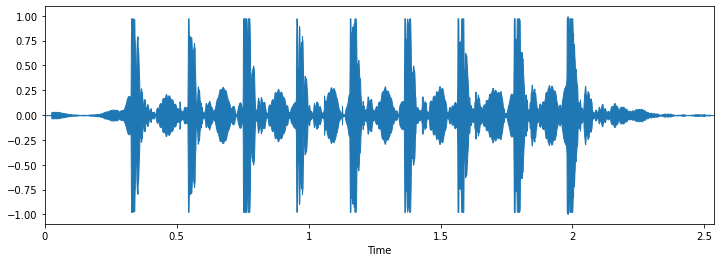

In [7]:
import matplotlib.pyplot as plt
import librosa 
import librosa.display
from scipy.io import wavfile as wav

filename = '/content/gdrive/MyDrive/Colab Notebooks/졸업 프로젝트/test/02fb6c5b.wav'
plt.figure(figsize = (12, 4))
data, sample_rate = librosa.load(filename)
_ = librosa.display.waveplot(data, sr = sample_rate)

In [8]:
import librosa 
from scipy.io import wavfile as wav

import numpy as np
 

librosa_audio, librosa_sample_rate = librosa.load(filename) 
scipy_sample_rate, scipy_audio = wav.read(filename) 

print('Original sample rate:', scipy_sample_rate) 
print('Librosa sample rate:', librosa_sample_rate) 

mfccs = librosa.feature.mfcc(y = librosa_audio, sr = librosa_sample_rate, n_mfcc = 40)
print(mfccs.shape)

Original sample rate: 44100
Librosa sample rate: 22050
(40, 110)


In [9]:
print('Original audio file min~max range:', np.min(scipy_audio), 'to', np.max(scipy_audio))
print('Librosa audio file min~max range:', np.min(librosa_audio), 'to', np.max(librosa_audio))

Original audio file min~max range: -32248 to 31961
Librosa audio file min~max range: -0.9956452 to 0.9753389


In [10]:
max = 0

def extract_features(file_name):
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        mfccsscaled = np.mean(mfccs.T,axis=0)
        global max
        if mfccs.shape[1] > max:
            max = mfccs.shape[1]

    except Exception as e:
        print("Error encountered while parsing file: ", file_name)
        return None 
     
    return mfccsscaled

def make_dataset(folder) :
  dataset = []
  for file in tqdm(os.listdir(folder),colour='green'):
    if 'wav' in file:
      abs_file_path = os.path.join(folder,file)
      data = extract_features(abs_file_path)
      class_label = int(meta_df[meta_df.slice_file_name == file].class_label)
      dataset.append([data,class_label])
      
  print("Dataset 생성 완료")
  return pd.DataFrame(dataset,columns=['data','label'])



In [11]:
folder = "/content/gdrive/MyDrive/Colab Notebooks/졸업 프로젝트/all"
featuresdf = make_dataset(folder)

 79%|███████▉  | 5423/6846 [13:59<02:24,  9.82it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1323
  n_fft, y.shape[-1]
 95%|█████████▌| 6515/6846 [15:47<00:21, 15.73it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1103
  n_fft, y.shape[-1]
 95%|█████████▌| 6525/6846 [15:47<00:14, 22.92it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1523
  n_fft, y.shape[-1]
100%|██████████| 6846/6846 [16:23<00:00,  6.96it/s]

Dataset 생성 완료


In [12]:
featuresdf

,data,label
0,"[-501.3954, 110.44913, 1.4499779, 26.566763, 1...",11
1,"[-161.76297, 119.27542, 28.143839, 24.669304, ...",6
2,"[-545.8858, 9.034235, -10.742487, -5.742645, -...",11
3,"[-420.48596, 114.172585, -27.63459, 41.27422, ...",8
4,"[-324.74506, 18.080664, -26.460846, -13.677447...",1
...,...,...
6841,"[-384.54175, 147.73666, -31.549652, -14.390676...",1
6842,"[-337.16278, 79.659584, -41.211052, 13.73536, ...",5
6843,"[-268.59158, -16.49932, -100.10743, 13.6939535...",1
6844,"[-320.10416, 82.99428, -34.73433, 8.164023, -1...",5


In [13]:
print(featuresdf['label'].value_counts())

1     1267
2     1000
3     1000
4     1000
5      929
0      429
9      318
8      273
10     184
11     168
7      144
6      134
Name: label, dtype: int64


In [14]:
mfccs = librosa.feature.mfcc(y = librosa_audio, sr = librosa_sample_rate, n_mfcc = 40)
print(mfccs.shape)

(40, 110)


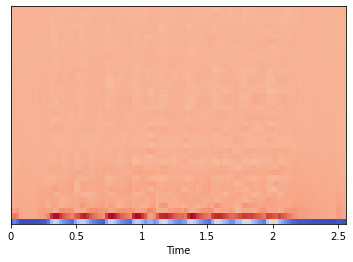

In [15]:
import librosa.display
librosa.display.specshow(mfccs, sr = librosa_sample_rate, x_axis = 'time')

In [16]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

X = np.array(featuresdf.data.tolist())
y = np.array(featuresdf.label.tolist())


le = LabelEncoder()
yy = to_categorical(le.fit_transform(y))

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size = 0.3, random_state = 42)

In [18]:
x_train.shape

(4792, 40)

In [19]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics 


num_labels = yy.shape[1]
filter_size = 2

# Construct model 
model = Sequential()

model.add(Dense(256, input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels))
model.add(Activation('softmax'))

model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy']
              , optimizer = 'adam')

In [20]:
from keras.callbacks import ModelCheckpoint 
from datetime import datetime

num_epochs = 200
num_batch_size = 32

# 얘 원래 있는 모델을 쓰는게 맞는지
checkpointer = ModelCheckpoint(filepath='/content/gdrive/MyDrive/Colab Notebooks/졸업 프로젝트/weights.best.basic_mlp.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now() 
model.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/200
147/150 [============================>.] - ETA: 0s - loss: 12.7150 - accuracy: 0.2536
Epoch 1: val_loss improved from inf to 2.17546, saving model to /content/gdrive/MyDrive/Colab Notebooks/졸업 프로젝트/weights.best.basic_mlp.hdf5
150/150 [==============================] - 4s 6ms/step - loss: 12.5463 - accuracy: 0.2540 - val_loss: 2.1755 - val_accuracy: 0.2361
Epoch 2/200
148/150 [============================>.] - ETA: 0s - loss: 2.5437 - accuracy: 0.2872
Epoch 2: val_loss improved from 2.17546 to 2.07374, saving model to /content/gdrive/MyDrive/Colab Notebooks/졸업 프로젝트/weights.best.basic_mlp.hdf5
150/150 [==============================] - 1s 3ms/step - loss: 2.5390 - accuracy: 0.2878 - val_loss: 2.0737 - val_accuracy: 0.3875
Epoch 3/200
147/150 [============================>.] - ETA: 0s - loss: 2.0825 - accuracy: 0.3429
Epoch 3: val_loss improved from 2.07374 to 1.87713, saving model to /content/gdrive/MyDrive/Colab Notebooks/졸업 프로젝트/weights.best.basic

In [22]:
score = model.evaluate(x_test, y_test, verbose = 1)
accuracy = 100 * score[1]

print('Pre-training accuracy: %.4f%%' % accuracy)

65/65 [==============================] - 0s 2ms/step - loss: 0.6350 - accuracy: 0.8520
Pre-training accuracy: 85.1996%


In [23]:
def print_prediction(file_name):
  featuresdf = make_dataset(file_name)
  audio_data = np.array(featuresdf.data.tolist())
  y_prob = model.predict(audio_data)
  predicted_vector = np.argmax(y_prob, axis=1)
  predicted_class = le.inverse_transform(predicted_vector)
  if predicted_class[0] == 0 :
    class_name = 'Car Horn'
  elif predicted_class[0] == 1 :
    class_name = 'Dog Bark'
  elif predicted_class[0] == 2 :
    class_name = 'Drilling'
  elif predicted_class[0] == 3 :
    class_name = 'Engine Idling'
  elif predicted_class[0] == 4 :
    class_name = 'Jack Hammer'
  else :
    class_name = 'Siren'

  print("The predicted class is:", class_name, '\n') # predicted_class[0]

  predicted_proba = y_prob[0]
  for i in range(len(predicted_proba)): 
      category = le.inverse_transform(np.array([i]))
      print(category[0], "\t\t : ", format(predicted_proba[i], '.32f') )


In [24]:
filename = "/content/gdrive/MyDrive/Colab Notebooks/졸업 프로젝트/testing"
df = print_prediction(filename)

100%|██████████| 2/2 [00:00<00:00,  5.42it/s]

Dataset 생성 완료
1/1 [==============================] - 0s 96ms/step
The predicted class is: Car Horn 

0 		 :  1.00000000000000000000000000000000
1 		 :  0.00000000000052685725790771464894
2 		 :  0.00000000001698518929671433141948
3 		 :  0.00000000001509985365910626597952
4 		 :  0.00000000000014800609197430925068
5 		 :  0.00000000000016062017438745607167
6 		 :  0.00000000000004516807256991703379
7 		 :  0.00000000000000280475139912295807
8 		 :  0.00000000000065788292782226198696
9 		 :  0.00000000000000016399325482451704
10 		 :  0.00000000000428963288501282846710
11 		 :  0.00000000000000353160731182081827


In [59]:
# extract feature 함수 재정의
import numpy as np
max_pad_len = 1400
test_num = 0

def extract_features_cnn(file_name):
  try:
      audio, sample_rate = librosa.load(file_name, res_type = 'kaiser_fast')
      mfccs = librosa.feature.mfcc(y=audio, sr = sample_rate, n_mfcc = 40)
      pad_width = max_pad_len - mfccs.shape[1]
      mfccs = np.pad(mfccs, pad_width = ((0, 0), (0, pad_width)), mode = 'constant')
      global max

      if mfccs.shape[1] > max:
        max = mfccs.shape[1]

  except Exception as e:
      print("Error 발생: ", file_name)
      return None
	
  return mfccs

In [60]:
def make_cnn_dataset(folder) :
  dataset = []
  for file in tqdm(os.listdir(folder),colour='green'):
    if 'wav' in file:
      abs_file_path = os.path.join(folder,file)
      data = extract_features_cnn(abs_file_path)
      class_label = int(meta_df[meta_df.slice_file_name == file].class_label)
      dataset.append([data, class_label])
      
  print("Dataset 생성 완료")
  return pd.DataFrame(dataset,columns=['data','label'])

In [61]:
folder = "/content/gdrive/MyDrive/Colab Notebooks/졸업 프로젝트/all"
featuresdf_cnn = make_cnn_dataset(folder)

 79%|███████▉  | 5423/6846 [09:42<02:19, 10.18it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1323
  n_fft, y.shape[-1]
 95%|█████████▌| 6515/6846 [11:24<00:16, 20.11it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1103
  n_fft, y.shape[-1]
 95%|█████████▌| 6525/6846 [11:24<00:12, 25.52it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1523
  n_fft, y.shape[-1]
100%|██████████| 6846/6846 [11:57<00:00,  9.55it/s]

Dataset 생성 완료


In [63]:
featuresdf_cnn

,data,label
0,"[[-520.2149, -456.2716, -459.38895, -525.4714,...",11
1,"[[-158.24812, -151.525, -155.69696, -154.9558,...",6
2,"[[-202.34315, -197.58293, -241.7225, -238.4811...",11
3,"[[-640.85406, -640.69934, -436.25058, -331.901...",8
4,"[[-544.4562, -544.24915, -541.4035, -528.37305...",1
...,...,...
6841,"[[-538.91986, -539.4391, -537.0789, -526.7657,...",1
6842,"[[-430.58435, -355.9189, -313.09894, -306.9612...",5
6843,"[[-289.511, -312.7844, -358.17758, -359.29666,...",1
6844,"[[-304.5093, -307.1538, -314.0389, -316.79462,...",5


In [65]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

x = np.array(featuresdf_cnn.data.tolist())
y = np.array(featuresdf_cnn.label.tolist())

le = LabelEncoder()
yy = to_categorical(le.fit_transform(y))

In [67]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, yy, test_size = 0.2, random_state = 42)

In [70]:
num_rows = 40
num_columns = 1400
num_channels = 1

print("train data shape")
print(x_train.shape)
print(x_test.shape)

x_train = x_train.reshape(x_train.shape[0], num_rows, num_columns, num_channels)
x_test = x_test.reshape(x_test.shape[0], num_rows, num_columns, num_channels)

print("\ntrain data reshape 결과")
print(x_train.shape)
print(x_test.shape)

train data shape
(5476, 40, 1400)
(1370, 40, 1400)

train data reshape 결과
(5476, 40, 1400, 1)
(1370, 40, 1400, 1)


In [71]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics

num_labels = yy.shape[1]
filter_size = 2

#CNN모델 구현
model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = 2, input_shape = (num_rows, num_columns, num_channels), activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 32, kernel_size = 2, activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 64, kernel_size = 2, activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 128, kernel_size = 2, activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.2))
model.add(GlobalAveragePooling2D())

model.add(Dense(num_labels, activation = 'softmax'))


#컴파일
model.compile(loss = 'categorical_crossentropy'
				, metrics = ['accuracy']
                , optimizer = 'adam')
                
model.summary()
score = model.evaluate(x_test, y_test, verbose = 1)
accuracy = 100 * score[1]

print('Pre-training accuracy: %.4f%%' % accuracy)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 39, 1399, 16)      80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 19, 699, 16)      0         
 )                                                               
                                                                 
 dropout_7 (Dropout)         (None, 19, 699, 16)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 18, 698, 32)       2080      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 9, 349, 32)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 9, 349, 32)       

In [72]:
from keras.callbacks import ModelCheckpoint 
from datetime import datetime

num_epochs = 50
num_batch_size = 32

# 얘 원래 있는 모델을 쓰는게 맞는지
checkpointer = ModelCheckpoint(filepath='/content/gdrive/MyDrive/Colab Notebooks/졸업 프로젝트/weights.best.cnn.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now() 
model.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test, y_test), callbacks=[checkpointer], verbose=1)

score = model.evaluate(x_test, y_test, verbose = 1)
accuracy = 100 * score[1]

print('final accuracy: %.4f%%' % accuracy)

duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/50
172/172 [==============================] - ETA: 0s - loss: 2.0041 - accuracy: 0.4010
Epoch 1: val_loss improved from inf to 1.60700, saving model to /content/gdrive/MyDrive/Colab Notebooks/졸업 프로젝트/weights.best.cnn.hdf5
172/172 [==============================] - 4s 14ms/step - loss: 2.0041 - accuracy: 0.4010 - val_loss: 1.6070 - val_accuracy: 0.5277
Epoch 2/50
169/172 [============================>.] - ETA: 0s - loss: 1.3629 - accuracy: 0.5786
Epoch 2: val_loss improved from 1.60700 to 1.34391, saving model to /content/gdrive/MyDrive/Colab Notebooks/졸업 프로젝트/weights.best.cnn.hdf5
172/172 [==============================] - 2s 11ms/step - loss: 1.3630 - accuracy: 0.5793 - val_loss: 1.3439 - val_accuracy: 0.5912
Epoch 3/50
168/172 [============================>.] - ETA: 0s - loss: 1.1743 - accuracy: 0.6311
Epoch 3: val_loss improved from 1.34391 to 1.26793, saving model to /content/gdrive/MyDrive/Colab Notebooks/졸업 프로젝트/weights.best.cnn.hdf5
172/172 [==

In [73]:
def print_prediction_cnn(file_name):
  featuresdf = make_cnn_dataset(file_name)
  audio_data = np.array(featuresdf.data.tolist())
  y_prob = model.predict(audio_data)
  predicted_vector = np.argmax(y_prob, axis=1)
  predicted_class = le.inverse_transform(predicted_vector)
  if predicted_class[0] == 0 :
      class_name = 'Car Horn'
  elif predicted_class[0] == 1 :
      class_name = 'Dog Bark'
  elif predicted_class[0] == 2 :
      class_name = 'Drilling'
  elif predicted_class[0] == 3 :
      class_name = 'Engine Idling'
  elif predicted_class[0] == 4 :
      class_name = 'Jack Hammer'
  elif predicted_class[0] == 5 :
      class_name = 'Siren'
  elif predicted_class[0] == 6 :
      class_name = 'Bus'
  elif predicted_class[0] == 7 :
      class_name = 'Chime'
  elif predicted_class[0] == 8 :
      class_name = 'Cough'
  elif predicted_class[0] == 9 :
      class_name = 'Knock'
  elif predicted_class[0] == 10 :
      class_name = 'Meow'
  elif predicted_class[0] == 11 :
      class_name = 'Telephone'
  else :
      class_name = "Can't recognize"

  print("The predicted class is:", class_name, '\n') # predicted_class[0]

  predicted_proba = y_prob[0]
  for i in range(len(predicted_proba)): 
      category = le.inverse_transform(np.array([i]))
      print(category[0], "\t\t : ", format(predicted_proba[i], '.32f') )
filename = "/content/gdrive/MyDrive/Colab Notebooks/졸업 프로젝트/testing"
df = print_prediction_cnn(filename)

100%|██████████| 2/2 [00:00<00:00, 67.65it/s]

Dataset 생성 완료
1/1 [==============================] - 0s 119ms/step


The predicted class is: Car Horn 

0 		 :  0.97052681446075439453125000000000
1 		 :  0.00795329548418521881103515625000
2 		 :  0.00153755571227520704269409179688
3 		 :  0.01046020444482564926147460937500
4 		 :  0.00039383835974149405956268310547
5 		 :  0.00454851379618048667907714843750
6 		 :  0.00012100282037863507866859436035
7 		 :  0.00007727898628218099474906921387
8 		 :  0.00032188216573558747768402099609
9 		 :  0.00034839709405787289142608642578
10 		 :  0.00268214312382042407989501953125
11 		 :  0.00102904019877314567565917968750


LSTM

In [ ]:
import librosa 
import numpy as np
import pandas as pd
import os

max = 0

def extract_features(file_name):
   
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        mfccsscaled = np.mean(mfccs.T,axis=0)
        global max
        if mfccs.shape[1] > max:
            max = mfccs.shape[1]

    except Exception as e:
        print("Error encountered while parsing file: ", file_name)
        return None 
     
    return mfccsscaled
    
    
# 데이터셋 path 지정
fulldatasetpath = '/content/gdrive/MyDrive/Colab Notebooks/졸업 프로젝트/fold1'

metadata = f1

features = []

# 각 소리에 대해 feature를 추출
for index, row in metadata.iterrows():
    
    file_name = os.path.join(os.path.abspath(fulldatasetpath)+'/'+str(row["slice_file_name"]))
    
    class_label = row["classID"]
    data = extract_features(file_name)
    
    features.append([data, class_label])

# df로 만들기
featuresdf = pd.DataFrame(features, columns=['feature','class_label'])

print('Finished feature extraction from ', len(featuresdf), ' files') 
print('Max :',max)

Finished feature extraction from  538  files
Max : 173


In [40]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

x = np.array(featuresdf.data.tolist())
y = np.array(featuresdf.label.tolist())

le = LabelEncoder()
yy = to_categorical(le.fit_transform(y))

In [41]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, yy, test_size = 0.3, random_state = 42)

In [42]:
print("train data shape")
print(x_train.shape)
print(x_test.shape)

#x_train=x_train.reshape(2176,40,1)
x_train = np.reshape(x_train, (len(x_train), len(x_train[0]), -1))
x_test = np.reshape(x_test, (len(x_test), len(x_test[0]), -1))

#print(y_train.shape)
#print(y_test.shape)

print("\ntrain data reshape 결과")
print(x_train.shape)
print(x_test.shape)

train data shape
(4792, 40)
(2054, 40)

train data reshape 결과
(4792, 40, 1)
(2054, 40, 1)


In [43]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import GRU, LSTM, Embedding               # RNN
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics 

num_labels = y_train.shape[1]

#LSTM 모델 구현
model = Sequential()    
model.add(LSTM(256,input_shape=(40,1),return_sequences=False))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
	#model.add(TimeDistributed(Dense(vocabulary)))
model.add(Dense(num_labels, activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
# Display model architecture summary 
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dense_3 (Dense)             (None, 512)               131584    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 512)               262656    
                                                                 
 dropout_4 (Dropout)         (None, 512)              

In [44]:
from keras.callbacks import ModelCheckpoint 
from datetime import datetime

num_epochs = 50
num_batch_size = 32

# 얘 원래 있는 모델을 쓰는게 맞는지
checkpointer = ModelCheckpoint(filepath='/content/gdrive/MyDrive/Colab Notebooks/졸업 프로젝트/weights.best.lstm.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now() 
model.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test, y_test), callbacks=[checkpointer], verbose=1)

duration = datetime.now() - start
print("Training completed in time: ", duration)

score = model.evaluate(x_test, y_test, verbose = 1)
accuracy = 100 * score[1]

print('Pre-training accuracy: %.4f%%' % accuracy)

Epoch 1/50
149/150 [============================>.] - ETA: 0s - loss: 1.9975 - accuracy: 0.3150
Epoch 1: val_loss improved from inf to 1.72798, saving model to /content/gdrive/MyDrive/Colab Notebooks/졸업 프로젝트/weights.best.lstm.hdf5
150/150 [==============================] - 7s 15ms/step - loss: 1.9952 - accuracy: 0.3153 - val_loss: 1.7280 - val_accuracy: 0.3841
Epoch 2/50
149/150 [============================>.] - ETA: 0s - loss: 1.6867 - accuracy: 0.4178
Epoch 2: val_loss improved from 1.72798 to 1.68788, saving model to /content/gdrive/MyDrive/Colab Notebooks/졸업 프로젝트/weights.best.lstm.hdf5
150/150 [==============================] - 1s 9ms/step - loss: 1.6877 - accuracy: 0.4174 - val_loss: 1.6879 - val_accuracy: 0.4080
Epoch 3/50
150/150 [==============================] - ETA: 0s - loss: 1.5698 - accuracy: 0.4633
Epoch 3: val_loss improved from 1.68788 to 1.54105, saving model to /content/gdrive/MyDrive/Colab Notebooks/졸업 프로젝트/weights.best.lstm.hdf5
150/150 [

In [45]:
def print_prediction(file_name):
  featuresdf = make_dataset(file_name)
  audio_data = np.array(featuresdf.data.tolist())
  y_prob = model.predict(audio_data)
  predicted_vector = np.argmax(y_prob, axis=1)
  predicted_class = le.inverse_transform(predicted_vector)
  if predicted_class[0] == 0 :
      class_name = 'Car Horn'
  elif predicted_class[0] == 1 :
      class_name = 'Dog Bark'
  elif predicted_class[0] == 2 :
      class_name = 'Drilling'
  elif predicted_class[0] == 3 :
      class_name = 'Engine Idling'
  elif predicted_class[0] == 4 :
      class_name = 'Jack Hammer'
  elif predicted_class[0] == 5 :
      class_name = 'Siren'
  elif predicted_class[0] == 6 :
      class_name = 'Bus'
  elif predicted_class[0] == 7 :
      class_name = 'Chime'
  elif predicted_class[0] == 8 :
      class_name = 'Cough'
  elif predicted_class[0] == 9 :
      class_name = 'Knock'
  elif predicted_class[0] == 10 :
      class_name = 'Meow'
  elif predicted_class[0] == 11 :
      class_name = 'Telephone'
  else :
      class_name = "Can't recognize"

  print("The predicted class is:", class_name, '\n') # predicted_class[0]

  predicted_proba = y_prob[0]
  for i in range(len(predicted_proba)): 
      category = le.inverse_transform(np.array([i]))
      print(category[0], "\t\t : ", format(predicted_proba[i], '.32f') )

In [46]:
filename = "/content/gdrive/MyDrive/Colab Notebooks/졸업 프로젝트/testing"
df = print_prediction(filename)

100%|██████████| 2/2 [00:00<00:00, 73.17it/s]

Dataset 생성 완료


1/1 [==============================] - 0s 424ms/step
The predicted class is: Car Horn 

0 		 :  1.00000000000000000000000000000000
1 		 :  0.00000000664586297105529411055613
2 		 :  0.00000000011504471680856553916783
3 		 :  0.00000000000128749007982653651538
4 		 :  0.00000000000083608727580175568050
5 		 :  0.00000000000179804175021169854176
6 		 :  0.00000000000779072726470042553615
7 		 :  0.00000000025740756748326987235487
8 		 :  0.00000000000000002593236035772118
9 		 :  0.00000000000000041135371577928886
10 		 :  0.00000000001924886985915641446354
11 		 :  0.00000000073429645697231649137393
